# Домашнее задание №2

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW1 <Фамилия Имя>**

soft deadline: 14.03.2021T23:59:00+0300

hard deadline: 21.03.2021T23:59:00+0300

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/hw2

/content/drive/.shortcut-targets-by-id/1Q4WEGTjMUD6PL7F_jH_xsHpf9R0XT5j6/hw2


In [ ]:
import ipywidgets as widgets
import numpy as np

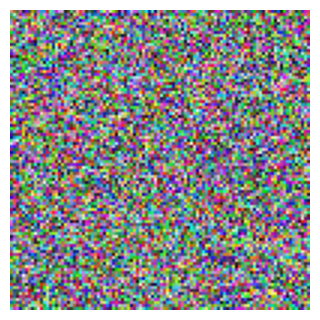

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

lena = np.random.rand(100,100,3) * 255
lena = lena.astype('uint8')

#lena = cv2.imread("lena.jpg")
show(lena)

**1. (5 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [ ]:
def show_gamma(img, corrected, values, size=3):
    fig, ax = plt.subplots(1, 3, figsize=(3.6*size, size))
    
    ax[0].set_title("original")
    ax[0].set_axis_off()
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    ax[1].set_title('corrected')
    ax[1].set_axis_off()
    ax[1].imshow(cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB))

    ax[2].set_title('gamma corecction')
    ax[2].set_xlim(0.0, 1.0)
    ax[2].set_ylim(0, 1.0)
    ax[2].plot(np.arange(0, 256) / 255., values / 255.)

In [ ]:
img = lena

@widgets.interact_manual(A=(0, 2, 0.1), gamma=(0, 10, 0.1))
def lena_gamma_correction(A=1, gamma=1):
    table = np.array([A * ((i / 255.0) ** gamma) * 255 for i in range(256)]).clip(0, 255).astype("uint8")
    corrected = cv2.LUT(img, table)
    show_gamma(img, corrected, table)

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0), FloatSlider(value=1.0, description='ga…

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

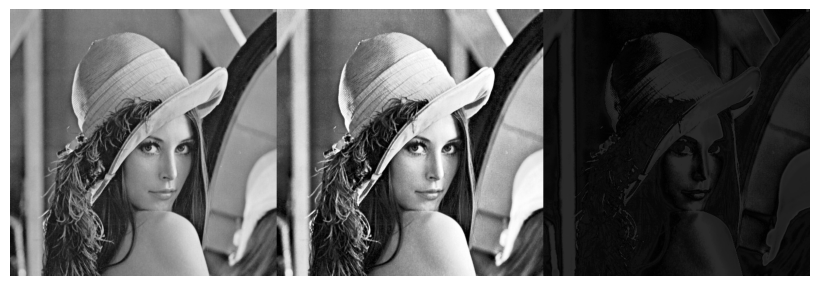

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_norm = cv2.normalize(lena_gray, None, 0, 255, cv2.NORM_MINMAX)
lena_equal = cv2.equalizeHist(lena_gray)
diff = cv2.absdiff(lena_norm, lena_equal)
lena_concat = np.concatenate((lena_norm, lena_equal, diff), axis=1)
show(lena_concat, size=8)

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
def salt_pepper(src, p, q):
    h, w = src.shape
    black, white, normal = np.random.multinomial(1, [p, q, 1-p-q], size=h*w).T
    black = black.reshape(h, w)
    white = white.reshape(h, w)
    normal = normal.reshape(h, w)
    src[black==1] = 0
    src[white==1] = 255  
    return src

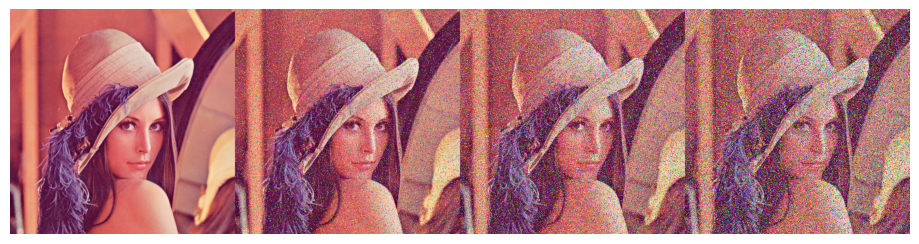

In [ ]:
lena = cv2.imread("lena.jpg")
lenas = np.copy(lena)
pqs = [0.05, 0.1, 0.15]

for pq in pqs:
    b, g, r = cv2.split(lena)

    b = salt_pepper(b, pq, pq)
    g = salt_pepper(g, pq, pq)
    r = salt_pepper(r, pq, pq)

    lena_salt_peper = cv2.merge([b, g, r])
    lenas = np.concatenate((lenas, lena_salt_peper), axis=1)

show(lenas, size=9)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)



In [ ]:
def mse(imageA, imageB):
    return np.mean((imageA.astype("float") - imageB.astype("float"))**2)

MSE: 883.4330940246582


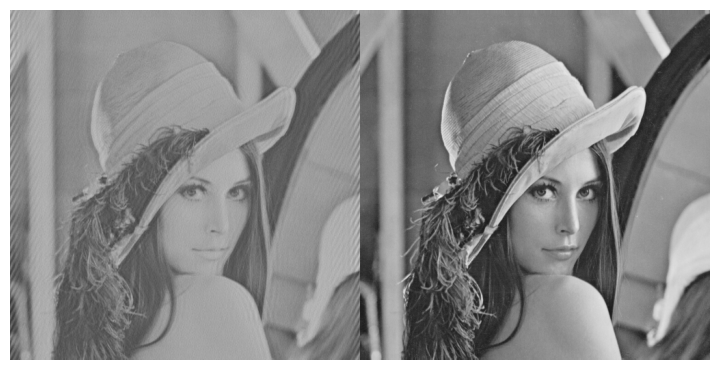

In [ ]:
img = cv2.imread("lena_diagonal.jpg", 0)
# show(img)

img_orig = cv2.imread("lena_gray_512.tif")
# show(img_orig)

fft = np.fft.fft(img)
fft[:, 63:79] = 0
fft[:, -79:-63] = 0

img_gray = np.fft.ifft(fft).real.astype(np.uint8)
img_full = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
pair = np.concatenate((img_full, img_orig), axis=1)

print("MSE: {0}".format(mse(img_full, img_orig)))
show(pair , size=7)

**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

In [ ]:
def mse(imageA, imageB):
    return np.mean((imageA.astype("float") - imageB.astype("float"))**2)

1. noise - original. MSE: 2184.1810162862143
2. median - original. MSE: 136.62162907918295


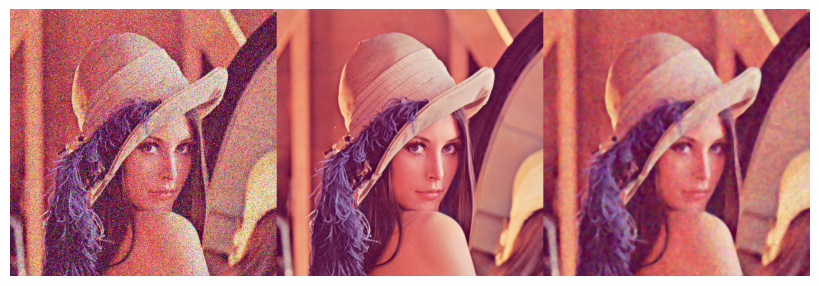

In [ ]:
img = cv2.imread("lena_color_512-noise.tif")
img_orig  = cv2.imread("lena_color_512.tif")
median = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(img,3),5),5),3)

print('1. noise - original. MSE:', mse(img, img_orig))
print('2. median - original. MSE:', mse(median, img_orig))
show(np.concatenate((img, img_orig, median), axis=1), size=8)

**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

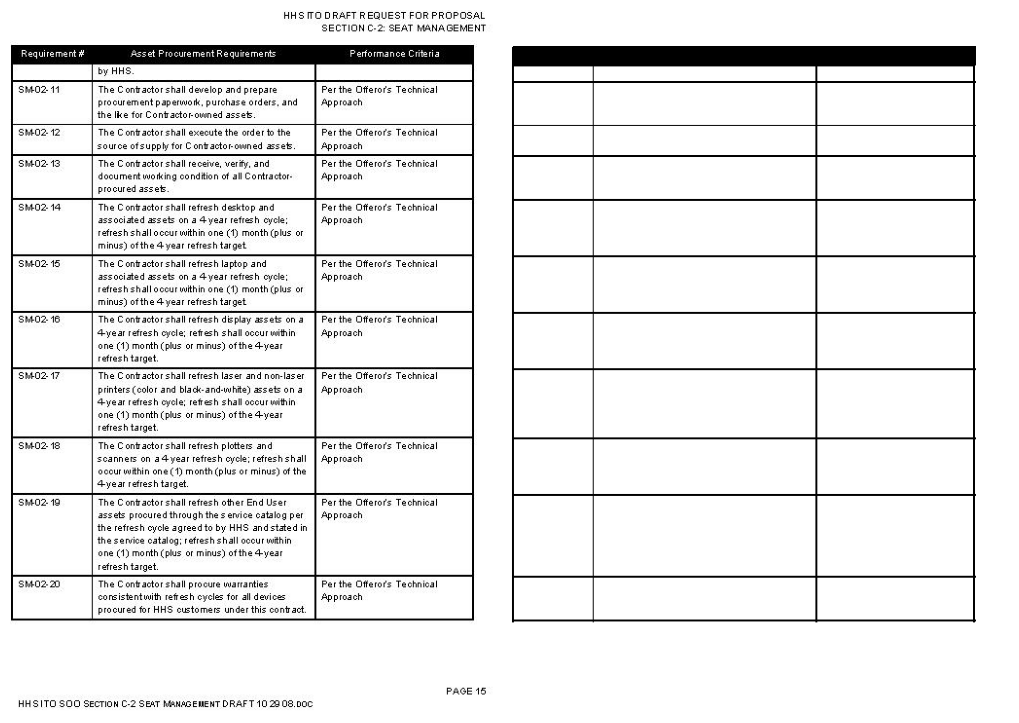

In [ ]:
# оригинал
table = cv2.imread("table.jpg")

# бинаризация + инверсия
binary_table = cv2.threshold(table, 127, 255, cv2.THRESH_BINARY_INV)[1]

# убрать надписи в заголовке
kernel_1 = np.ones((2,2), dtype='uint8') 
closing = cv2.morphologyEx(binary_table, cv2.MORPH_CLOSE, kernel_1)

# vertical
kernel_2 = np.ones((8, 1), dtype='uint8')
v_lines = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel_2)

# horizontal
kernel_3 = np.ones((1, 14), dtype='uint8')
h_lines = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel_3)

# объединение
new_table = (255 - 255 * np.logical_or(v_lines, h_lines)).astype("uint8")

# отображение
steps = np.concatenate((binary_table, closing, v_lines, h_lines), axis=1)
before_after = np.concatenate((table, new_table), axis=1)

# show(table, size=10)
# show(new_table, size=10)
show(before_after, size=10)
# show(steps, size=10)

**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

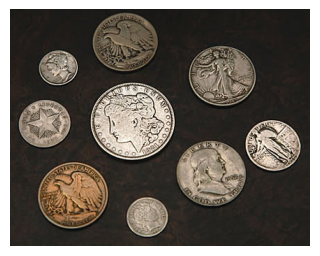

In [ ]:
coins_1 = cv2.imread("coins_1.jpg")
show(coins_1)

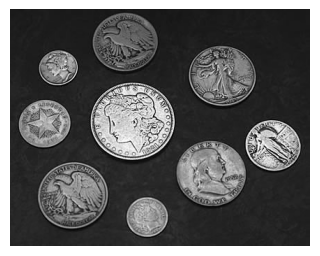

In [ ]:
coins_grey = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)
show(coins_grey)

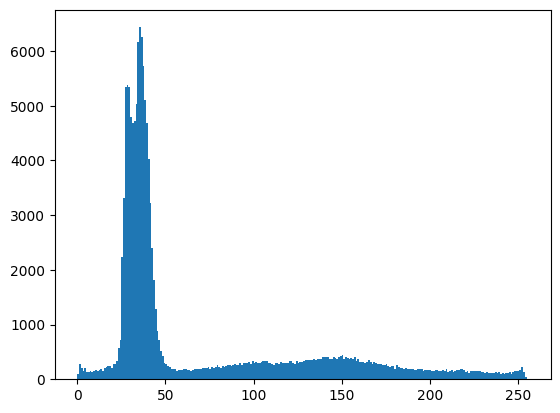

In [ ]:
plt.hist(coins_grey.ravel(),256,[0,256]); plt.show()

In [ ]:
def coordinates(gray_img):
    unique_, counts = np.unique(gray_img, return_counts=True)
    unique = unique_[np.argsort(counts)][::-1]
    centers = np.zeros((unique.shape[0], 2), dtype=int)
    for i, color in enumerate(unique):
        xs, ys = np.where(gray_img==color)
        centers[i, 0], centers[i, 1] = ys.mean(), xs.mean() ###!!!
    return centers[1:]

In [ ]:
def colored_components(labels):
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    return labeled_img

In [ ]:
def numbers(img_, centers):
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 1
    color = (0, 0, 0)  
    thickness = 2

    img = np.copy(img_)
    for i, coo in enumerate(centers):
        org = (int(coo[0]) - 10, int(coo[1]) + 10)
        cv2.putText(img, str(i+1), org, font, fontScale, color, thickness, cv2.LINE_AA)

    return img

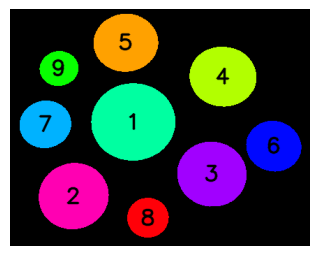

In [ ]:
# бинаризация
new_coins_grey = np.copy(coins_grey)
new_coins_grey[coins_grey<75] = 0
new_coins_grey[coins_grey>=75] = 255
# show(new_coins_grey)

# морфология
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(new_coins_grey, cv2.MORPH_CLOSE, kernel)
# show(closing)

# кластеризация + центры
_, gray_img = cv2.connectedComponents(closing)
centers = coordinates(gray_img)

# раскраска
colored_coins = colored_components(gray_img)
# show(colored_coins)

# нумерация
coins_with_numbers = numbers(colored_coins, centers)
show(coins_with_numbers)

**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

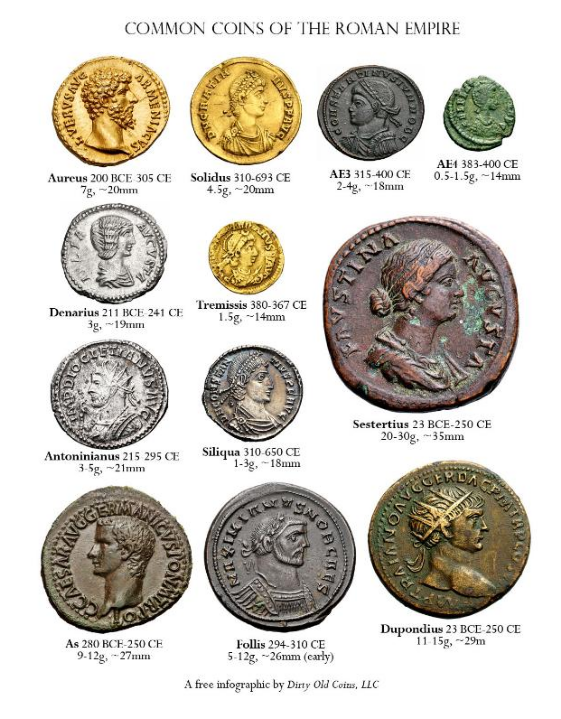

In [ ]:
coins_2 = cv2.imread("coins_2.jpg")
show(coins_2, size=7)

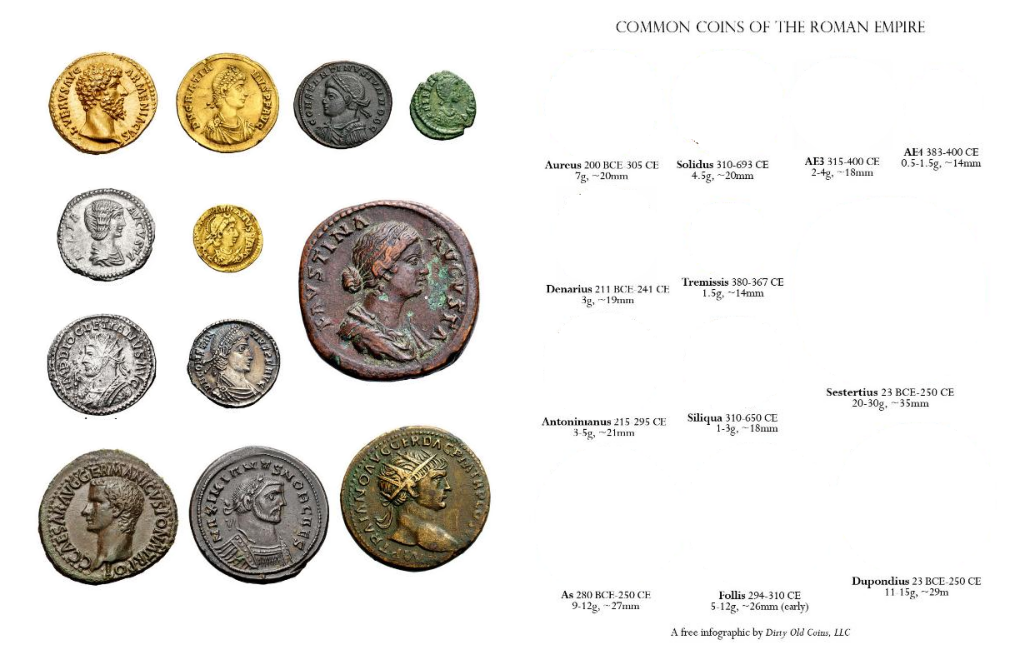

In [ ]:
# mono
gray_coins = cv2.cvtColor(coins_2, cv2.COLOR_BGR2GRAY)
# plt.hist(gray_coins.ravel(),256,[0,256]); plt.show()

# отсекаем по порогу
binary_inv = (gray_coins < 230).astype('uint8') * 255

# стираем надписи
kernel_1 = np.ones((5,5), dtype='uint8') 
opening = cv2.morphologyEx(binary_inv, cv2.MORPH_OPEN, kernel_1)

# заполняем пустоты
kernel_2 = np.ones((20, 20), dtype='uint8')
closing =  cv2.morphologyEx(opening , cv2.MORPH_CLOSE, kernel_2)

# расширяем контуры
kernel = np.ones((9,11), dtype='uint8')
dilation = cv2.dilate(closing, kernel, 0)

# steps
steps = np.concatenate((gray_coins, thresh, opening, closing, dilation), axis=1)

# coins + text
only_coins = coins_2.copy()
only_coins[dilation == 0] = 255

only_text = coins_2.copy()
only_text[dilation == 255] = 255

both = np.concatenate((res_1, res_2), axis=1)

# visualize
show(both, size=10)
# show(steps, size=10)

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений.  В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

В итоге нужно сделать мини отчет по тому, какой метод работает лучше. И в конце выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются этим методом.

**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.

In [ ]:
import glob

In [ ]:
leaves = []
for image in glob.glob("datasets/leaves/*"):
    leaves.append(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))

len =  69


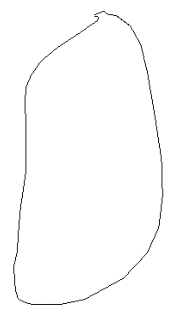

In [ ]:
size = len(leaves)
print("len = ", size)
show(leaves[np.random.randint(0, size, dtype=int)])

In [ ]:
def distance(d1, d2):
    return np.sqrt(np.sum((d1 - d2)**2))

In [ ]:
def fourier_descriptor(img, coef_number = 20):
    contour = np.zeros(img.shape[:2])
    contour[(img == 0).any(2)] = 1
    contour_coords = np.vstack(np.where(contour == 1)).T

    center = np.mean(contour_coords, axis=0).astype('int')
    contour_coords -= center
    distance_to_center = np.linalg.norm(contour_coords, axis=1)

    angles =  np.arccos(contour_coords[:,1]/distance_to_center)
    angles[contour_coords[:,0]>0] = 2*np.pi - angles[contour_coords[:,0]>0]
    indeces = np.argsort(angles)

    contour_coords = contour_coords[indeces]
    distance_to_center = distance_to_center[indeces]
    
    N = len(contour_coords)
    arr = np.arange(N)
    coefs = np.array([distance_to_center.dot(np.exp(-np.complex(0,1)*2*np.pi*n*arr/N))/N for n in range(coef_number)])
    norm_coefs = np.absolute(coefs)
    
    return (norm_coefs/norm_coefs[0])[1:]

In [ ]:
def get_closest(all_images, number_pairs, num_coefs = 20, isPloting = True, number_cols = 2, return_id = False):
    descriptors = list(map(lambda img: fourier_descriptor(img, num_coefs), all_images))
    length = len(descriptors)
    compare_matrix = float('inf')*np.ones((length,length), dtype='float')

    for i in range(length-1):
        for j in range(i+1, length):
            compare_matrix[i,j] = distance(descriptors[i], descriptors[j])
    
    neighbours_id = np.zeros((number_pairs,2))

    for i in range(number_pairs):
        res_id = np.vstack(np.where(compare_matrix == compare_matrix.min())).T[0]
        neighbours_id[i] = res_id.copy()
        compare_matrix[res_id[0], res_id[1]] = float('inf')
        if(isPloting):
            if((2*i)%number_cols == 0):
                plt.figure(figsize=(number_cols*10,10))

            plt.subplot(1, number_cols, (2*i)%number_cols + 1)
            plt.imshow(all_images[res_id[0]], cmap='gray')
            plt.axis('off')

            plt.subplot(1, number_cols, (2*i+1)%number_cols + 1)
            plt.imshow(all_images[res_id[1]], cmap='gray')
            plt.axis('off')

    if(return_id):
        return neighbours_id

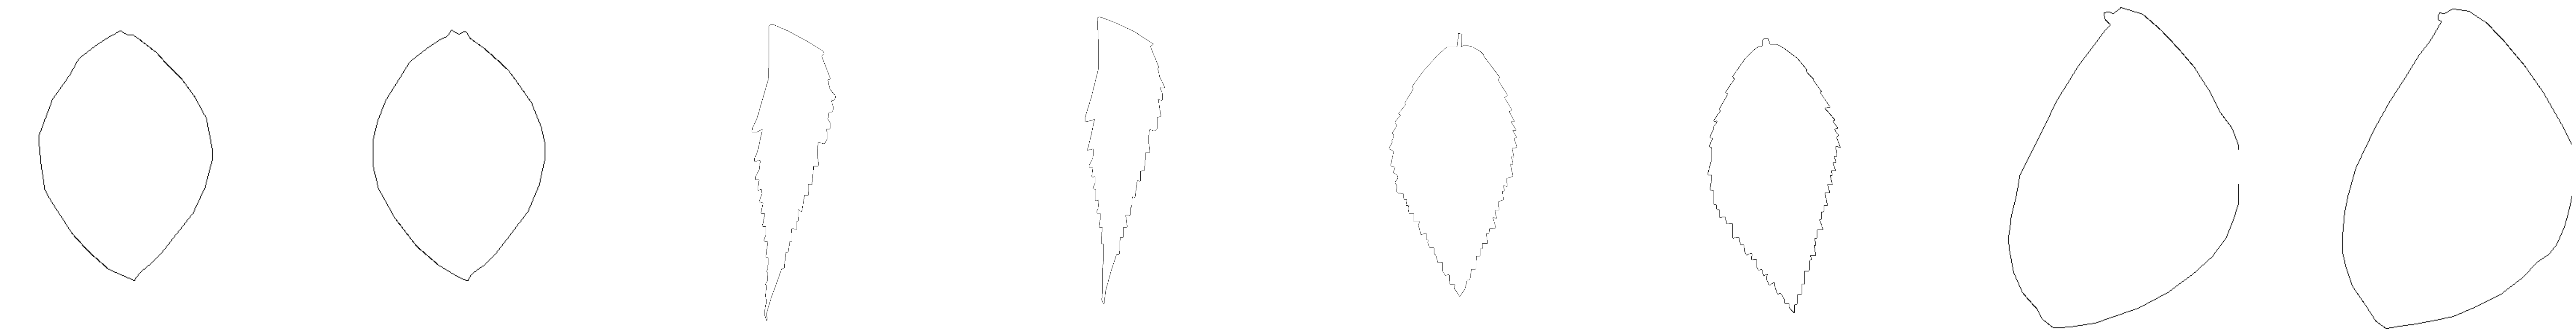

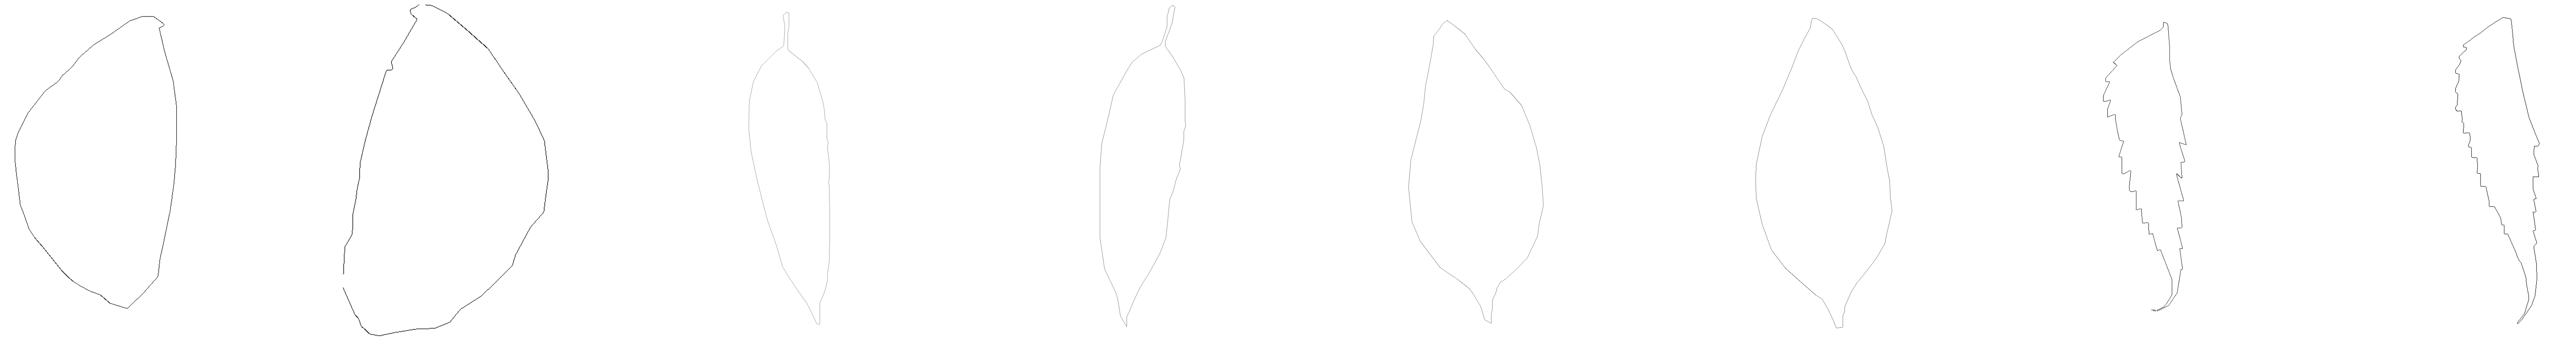

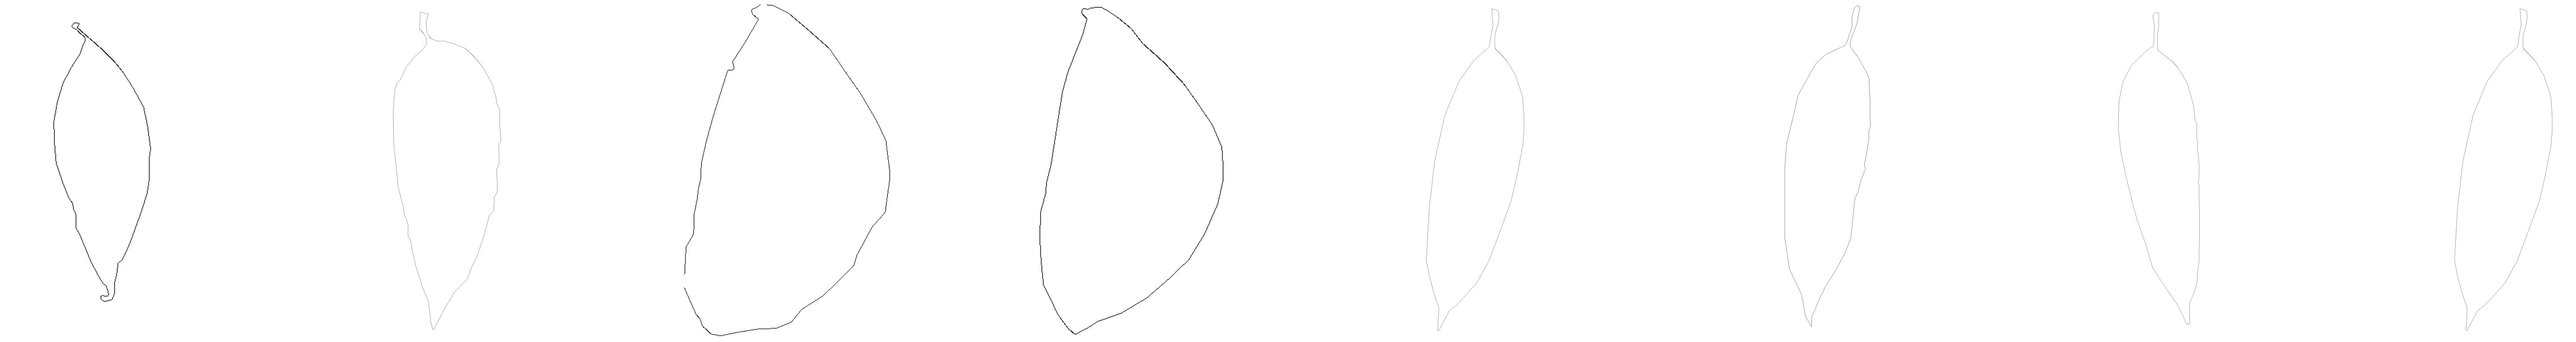

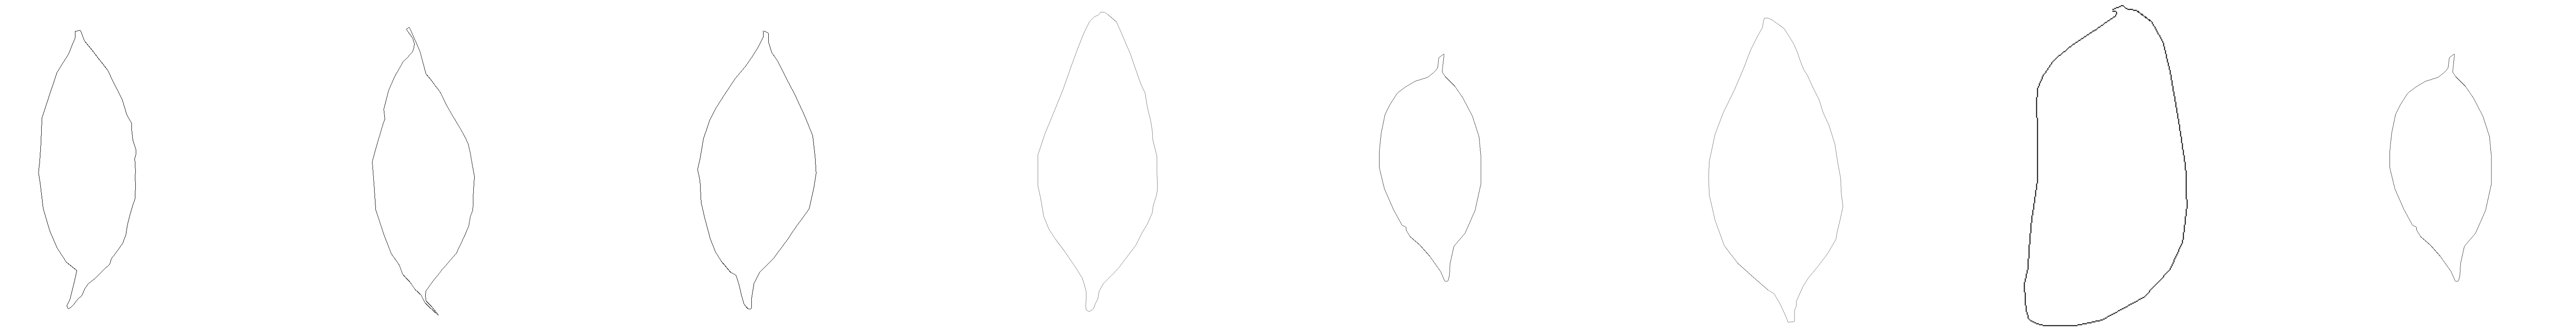

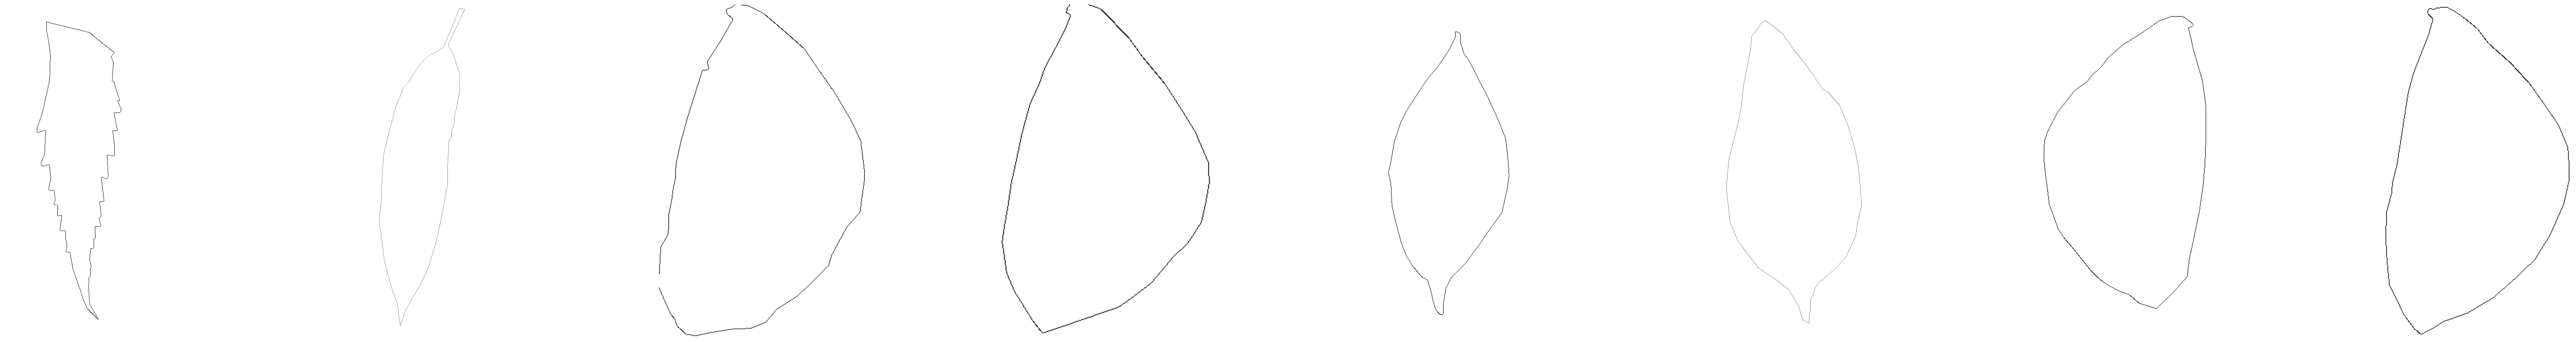

In [ ]:
get_closest(leaves, 20, number_cols = 8)